# Proyecto de campaña de marketing para Banco


Algunos puntos a considerar:
- Objetivo: se quiere predecir si un cliente del Banco va a realizar un depósito a plazo o no -> Predicción
- Los datos están etiquetados, es decir, tenemos una muestra del comportamiento observado de algunos usuarios -> Aprendizaje Supervisado
- La variable a explicar (y : ¿Va a depositar a plazo?) es categórica (si/no) -> Problema de clasificación

### Paso 1 : Importación de datos desde página web

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [236]:
url='https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/'+\
    'main/bank-marketing-campaign-data.csv'
df=pd.read_csv(url,sep=';')

### Paso 2 : Análisis exploratorio de datos


Lo primero es ver cómo vienen los datos, para ello se imprime una muestra aleatoria de 10 observaciones y se analiza la información principal y descriptiva de la base.

In [237]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
9268,29,admin.,married,high.school,no,no,no,telephone,jun,fri,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
40788,50,management,married,university.degree,no,no,no,cellular,sep,thu,...,4,999,3,failure,-1.1,94.199,-37.5,0.878,4963.6,no
4240,49,admin.,divorced,university.degree,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
2986,44,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
18165,34,self-employed,single,university.degree,no,no,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
36296,27,technician,married,professional.course,no,yes,no,cellular,jun,mon,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2,no
36438,31,management,married,university.degree,no,no,no,cellular,jun,tue,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,no
16052,27,services,single,high.school,no,yes,no,cellular,jul,tue,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
13324,45,self-employed,married,basic.9y,no,yes,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
10500,31,admin.,divorced,high.school,no,yes,yes,telephone,jun,tue,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Se observa que el dataset cuenta con 41.188 observaciones y 21 variables. A su vez, no existen valores nulos en el dataset. Con respecto al tipo de dato, se observa que las variables que están como 'objeto' deberían ser 'category'.

In [239]:
obj=df.select_dtypes('object').columns

In [240]:
df[obj]=df[obj].astype('category')

**Variables cualitativas**

In [241]:
df.describe(include='category')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Del resumen anterior se observa la cantidad de clases que tiene cada variable, la clase que predomina y su frecuencia. Así se puede decir que los clientes que trabajan como administradores, están casados, tienen un grado universitario, no son impagos (default), tienen préstamos hipotecarios pero no tienen personales y fueron contactados un miércoles de mayo, tienen mayor probabilidad de no tener un depósito a plazo.

Se explora las categorías de cada variables para luego transformarlas en caso de que sea necesario.

In [242]:
for i in df.select_dtypes('category'):
    print('')
    print('Categorias de ',i)
    print('')
    print(df[i].value_counts(normalize=True))


Categorias de  job

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64

Categorias de  marital

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

Categorias de  education

university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64

Categorias de  default

no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64

Categorias de  housing

yes        0.523842
no         0.452122
unknown

Se observa que algunas variables continene categorías 'unknow' que no aportan información y se pueden interpretar como valores faltantes. En el paso siguiente se dará un tratamiento a éstas categorías de manera de que las observaciones se puedan utilizar.

Con respecto a la variable objetivo 'y' se observa que un 89% de la muestra refiere a clientes que no han realizado un depósito a plazo, mientras que un 11% si lo han hecho.

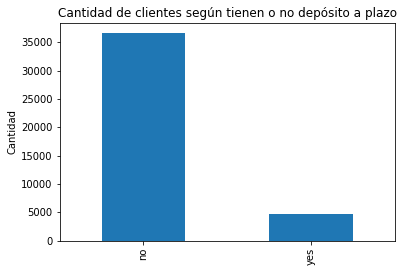

In [243]:
df['y'].value_counts().plot(kind='bar',title='Cantidad de clientes según tienen o no depósito a plazo',ylabel='Cantidad')
plt.show()

Al momento de seleccionar la muestra para entrenar el modelo se debe considerar que la muestra original se encuentra desbalanceada para que no genere un sesgo hacia el 'no' simplemente porque prepondera en los datos utilizados. 

**Variables cuantitativas**

In [244]:
round(df.describe(include=['int','float64']),2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [245]:
round(sum(df['pdays']==999)/len(df)*100)

96

Lo primero que se observa es que la variable pdays tiene un valor 999 que refiere a clientes que no fueron contactados en campañas anteriores. Si bien el 96% de la muestra nunca fue contactada, al ser una variable numérica, el modelo lo va a interpretar como contactos realizados hace 999 días. Para que no genere problemas en el modelado se decide darle un tratamiento, transformandola en una variable binaria indicando si fue contactado o no en campañas anteriores.

In [246]:
df['pdays']=['no' if i==999 else 'yes' for i in df['pdays']]
df['pdays']=df['pdays'].astype('category')
df['pdays'].value_counts()

no     39673
yes     1515
Name: pdays, dtype: int64

A simple vista se observa que en algunas variables distan mucho el 1er cuartil del minimo y/o el 3er cuartil del valor máximo, lo que llama la atención. A continuación se observa cuántas casos existen de este tipo.

In [247]:
dic_min={}
dic_max={}

for i in df.select_dtypes(['float64','int']):
    q3, q1 = np.percentile(df[i], [75,25])
    IQR=q3-q1
    dic_min[i]=q1-IQR*1.5
    dic_max[i]=q3+IQR*1.5
    print('Variable ',i)
    print('Existen', sum(df[i]<q1-IQR*1.5), 'posibles outliers en la cola izquierda') 
    print('Existen', sum(df[i]>q3+IQR*1.5), 'posibles outliers en la cola derecha')

Variable  age
Existen 0 posibles outliers en la cola izquierda
Existen 469 posibles outliers en la cola derecha
Variable  duration
Existen 0 posibles outliers en la cola izquierda
Existen 2963 posibles outliers en la cola derecha
Variable  campaign
Existen 0 posibles outliers en la cola izquierda
Existen 2406 posibles outliers en la cola derecha
Variable  previous
Existen 0 posibles outliers en la cola izquierda
Existen 5625 posibles outliers en la cola derecha
Variable  emp.var.rate
Existen 0 posibles outliers en la cola izquierda
Existen 0 posibles outliers en la cola derecha
Variable  cons.price.idx
Existen 0 posibles outliers en la cola izquierda
Existen 0 posibles outliers en la cola derecha
Variable  cons.conf.idx
Existen 0 posibles outliers en la cola izquierda
Existen 447 posibles outliers en la cola derecha
Variable  euribor3m
Existen 0 posibles outliers en la cola izquierda
Existen 0 posibles outliers en la cola derecha
Variable  nr.employed
Existen 0 posibles outliers en la 

Las variables que tienen posibles outliers son age, duration, campaign, previous y cons.conf.idx.

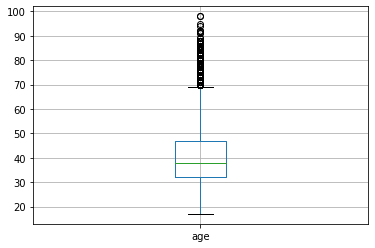

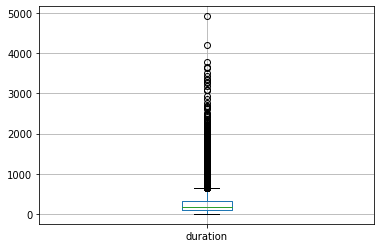

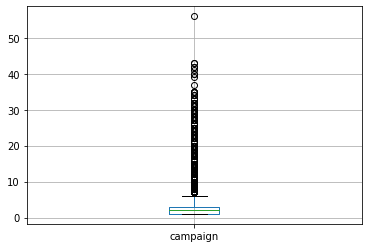

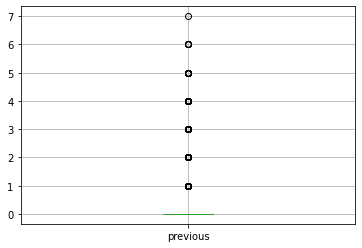

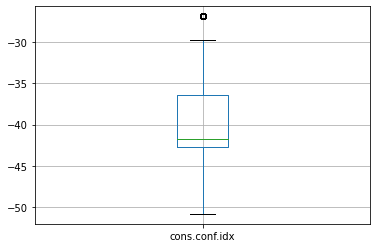

In [248]:
for i in ['age','duration','campaign','previous','cons.conf.idx']:
    df[[i]].boxplot()
    plt.show()

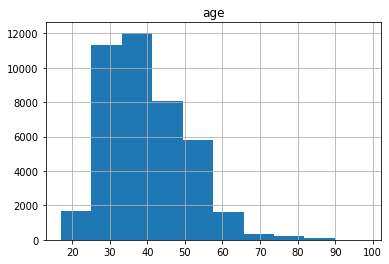

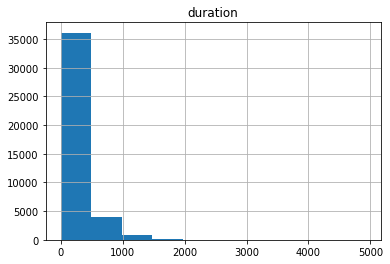

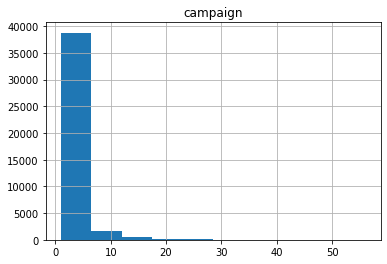

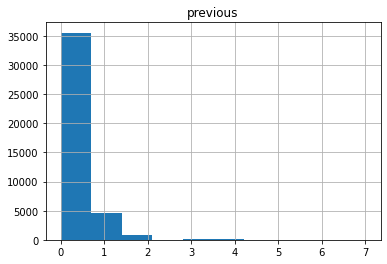

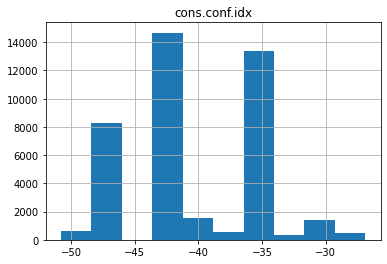

In [249]:
for i in ['age','duration','campaign','previous','cons.conf.idx']:
    df[[i]].hist()
    plt.show()

Si bien considerando la técnica de detección de outliers utilizando el Rango Intercuartilico indicaría que existen datos atípico para éstas variables, se debe considerar que ésta técnica toma como supuesto que las variables se distribuyen de manera normal estándar, sin embargo visualmente no parecerían comportarse de ésta manera. Además si se analiza conceptualmente el rango de valores de las distintas variables, no parecerían ser tan anormales, sino que podrían deberse a una gran dispersión de los mismos. Al mismo tiempo, el comportamiento de la variable 'age' seguramente se deba a un tema generacional, no a un error en la muestra. Lo que se podría hacer en este caso es considerar distintos rangos etareos para la predicción ya que cada uno se comportará distinto.

En conslusión, se decide no eliminar ningún dato por concepto de outliers. Solo a modo ilustrativo se deja planteado el código del procedimiento que se habría realizado.

In [250]:
#for i in ['duration','campaign','cons.conf.idx']:
 #   df=df[(df[i]> dic_min[i]) & (df[i]<dic_max[i])]
  #  df.reset_index(inplace=True,drop=True)


A continuación se observa si existen lineas repetidas en el dataset.

In [251]:
print('Existen ', df.duplicated().sum(),'registros repetidos, se eliminan de la base de datos para que no interfieran en la predicción. Finalmente el dataset contiene ', len(df.drop_duplicates()),' registros únicos.')

df=df.drop_duplicates()

Existen  12 registros repetidos, se eliminan de la base de datos para que no interfieran en la predicción. Finalmente el dataset contiene  41176  registros únicos.


### Paso 3 : Preprocesamiento de la base de datos

**Variables cualitativas**

Del análisis anterior se detectó que existen algunas categorías 'unknown' las cuales se deben imputar antes de realizar el modelo de clasificación. A continuación se seleccionan las variables que tienen ésta categoría y luego se sustituye por la moda. 

In [252]:
uk=[]
for i in df:
    [uk.append(i) for n in df[i].unique() if n=='unknown']

print(uk)

['job', 'marital', 'education', 'default', 'housing', 'loan']


In [253]:
for i in uk:
    df=df.replace({i:'unknown'}, df[i].mode()[0]) 

# Control
#uk=[]
#for i in df:
 #   [uk.append(i) for n in df[i].unique() if n=='unknown']

#print(uk)

In [254]:
df.describe(include='category')

,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,11,3,7,2,2,2,2,10,5,2,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,no,nonexistent,no
freq,10749,25001,13894,41173,22561,34928,26135,13767,8618,39661,35551,36537


Luego de asignarle la moda a las categorias 'unknown', se observa que la cantidad de categorías disminuye en una pero el valor más frecuente ('top') se mantiene, como era de esperar.

A continuación se sustituyen las categorías 'basic.9y','basic.6y','basic4y' de la variable education a 'middle_school'.

In [255]:
df=df.replace({'education':['basic.9y','basic.6y','basic.4y']}, 'middle_school')
df['education'].value_counts()

university.degree      13894
middle_school          12512
high.school             9512
professional.course     5240
illiterate                18
Name: education, dtype: int64

Se divide en rangos la variable 'age' en linea a lo planteado con anterioridad.

In [256]:
df['age_rang']=pd.cut(df['age'],bins=[10,20,30,40,50,60,70,80,90,100])
df['age_rang']=df['age_rang'].astype('category')

In [257]:
df['age_rang'].value_counts()

(30, 40]     16380
(40, 50]     10237
(20, 30]      7241
(50, 60]      6269
(60, 70]       488
(70, 80]       302
(10, 20]       140
(80, 90]       109
(90, 100]       10
Name: age_rang, dtype: int64

**Encoding**

Hot encoding: se aplica a las variables categoricas que pueden ser utilizadas como features.

Label encoding: se aplica a la variable target.

In [258]:
he=df.select_dtypes('category').drop(columns=['y']).columns

In [259]:
df_cod=pd.get_dummies(df,columns=he)

In [260]:
df_cod['y']=df.y.cat.codes

In [261]:
df_cod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   duration                       41176 non-null  int64  
 2   campaign                       41176 non-null  int64  
 3   previous                       41176 non-null  int64  
 4   emp.var.rate                   41176 non-null  float64
 5   cons.price.idx                 41176 non-null  float64
 6   cons.conf.idx                  41176 non-null  float64
 7   euribor3m                      41176 non-null  float64
 8   nr.employed                    41176 non-null  float64
 9   y                              41176 non-null  int8   
 10  job_admin.                     41176 non-null  uint8  
 11  job_blue-collar                41176 non-null  uint8  
 12  job_entrepreneur               41176 non-null 

In [262]:
df_cod.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,poutcome_success,"age_rang_(10, 20]","age_rang_(20, 30]","age_rang_(30, 40]","age_rang_(40, 50]","age_rang_(50, 60]","age_rang_(60, 70]","age_rang_(70, 80]","age_rang_(80, 90]","age_rang_(90, 100]"
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,0,0,1,0,0,0,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,0,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,0,0,1,0,0,0,0


**Variables cuantitativas**

Del análisis exploratorio no surge la necesidad de realizarle ningún tratamiento a éstas variables. La estandarización se realiza en el punto siguiente.

> Si bien en la letra del ejercicio dice que existen valores desconocidos, no se encontraron.

### Step 4

Analizando las variables a considerar como explicativas del modelo, se decide eliminar la variable 'duration' ya que el objetivo del proyecto es estimar la eficiencia de la campaña y cuando se realiza la llamada dentro de la campaña, el resultado de la misma ya se hace efectivo, por lo cual sería cierto. 

Para el resto de variables se analiza la correlación entre ellas para controlar que no exista multicolinealidad y afecte el modelo.

In [263]:
list=[]
for i, r in df_cod.corr().iterrows():
    list.append([(n,v) for n,v in r.items() if (v > 0.9) & (v < 1)])


print(list)

[[], [], [], [], [('euribor3m', 0.972243830979756), ('nr.employed', 0.9069494985179554)], [], [], [('emp.var.rate', 0.972243830979756), ('nr.employed', 0.9451459468620566)], [('emp.var.rate', 0.9069494985179554), ('euribor3m', 0.9451459468620566)], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [('poutcome_success', 0.9502828225873861)], [], [], [('pdays_yes', 0.9502828225873861)], [], [], [], [], [], [], [], [], []]


Se observa que las variables que podrían estar linealmente correlacionadas son 'euribor3m', 'nr.employed' y 'emp.var.rate'. Es razonable dado que son índices o ratios que se relacionan con el mercado laboral y seguramente varien en conjunto. Por lo anterior se decide considerar solamente la variable 'emp.var.rate'.


In [264]:
df_cod=df_cod.drop(columns=['euribor3m', 'nr.employed'])


A continuación se evalúa la correlación entre los posibles features y la variable dependiente tomando como criterio de selección, aquellas variables que tengan una correlación absoluta mayor a 0.05 con la variable y.

In [265]:
f=[]
pd.set_option('display.max_rows',110)
for i,r in df_cod.corr()[['y']].iterrows():
    if (r[0] > 0.05) | (r[0] < -0.05):
        f.append(i)
        print(i,r[0])

duration 0.4052972612685261
campaign -0.06636068437609752
previous 0.23020157021544804
emp.var.rate -0.2982885042462049
cons.price.idx -0.13613397100799632
cons.conf.idx 0.05480181650950573
y 1.0
job_blue-collar -0.07443148515321887
job_retired 0.09236405309496006
job_student 0.09396188269293622
marital_single 0.05420850848467096
education_middle_school -0.05354832781951105
education_university.degree 0.05761441497724151
contact_cellular 0.14477421661588266
contact_telephone -0.14477421661588413
month_apr 0.07618753725161154
month_dec 0.07931055688225107
month_mar 0.1440273804163184
month_may -0.10827768281628189
month_oct 0.13753837746474565
month_sep 0.12607860850016314
pdays_no -0.3249098020820296
pdays_yes 0.32490980208203085
poutcome_nonexistent -0.19352234318861486
poutcome_success 0.3163015630473198
age_rang_(10, 20] 0.05440051937507881
age_rang_(20, 30] 0.05068482968670524
age_rang_(40, 50] -0.05639423908929789
age_rang_(60, 70] 0.11144974043447008
age_rang_(70, 80] 0.098099950

In [267]:
X=df_cod[f].drop(columns='y')
y=df_cod['y']

In [268]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     41176 non-null  int64  
 1   campaign                     41176 non-null  int64  
 2   previous                     41176 non-null  int64  
 3   emp.var.rate                 41176 non-null  float64
 4   cons.price.idx               41176 non-null  float64
 5   cons.conf.idx                41176 non-null  float64
 6   job_blue-collar              41176 non-null  uint8  
 7   job_retired                  41176 non-null  uint8  
 8   job_student                  41176 non-null  uint8  
 9   marital_single               41176 non-null  uint8  
 10  education_middle_school      41176 non-null  uint8  
 11  education_university.degree  41176 non-null  uint8  
 12  contact_cellular             41176 non-null  uint8  
 13  contact_telephon

Selección de la muestra de entrenamiento y prueba considerando una proporción 80-20.

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [270]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

A continuación se estandariza la muestra de entrenamiento y se utilizan mismos parámetros para transformar la muestra de prueba.

In [271]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform (X_test)

Al plantear el modelo se considera que la muestra original está desbalanceada definiendo el hiperparámetro 'class_weight'. Mediante el mismo se penaliza el error de clasificación de la clase menos representada, que en éste caso es 'yes' (1). Para definir los pesos, se sigue la buena práctica de utilizar la frecuencia de la clase opuesta, es decir, para la clase 0 se asigna un peso de 11% y a la 1 se asigna un 89%.

Fuente:https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b

In [272]:
df_cod['y'].value_counts(normalize=True)

0    0.887337
1    0.112663
Name: y, dtype: float64

In [273]:
w={0:11,1:89} #Pesos
lg= LogisticRegression(random_state=57, class_weight=w) # Se define el modelo


In [274]:
lg.fit(X_train_sc,y_train) # Se entrena

LogisticRegression(class_weight={0: 11, 1: 89}, random_state=57)

In [275]:

y_pred = lg.predict(X_test_sc) # Se testea
y_pred[:10]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int8)

In [276]:
pd.crosstab(np.array(y_test),np.array(y_pred), rownames=['Actual'],colnames=['Prediction'])

Prediction,0,1
Actual,,
0,6237,1100
1,99,800


In [277]:
df_pred=pd.DataFrame({'Actual':y_test,'Prediction':y_pred})

In [278]:
print(classification_report(df_pred['Actual'],df_pred['Prediction']))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7337
           1       0.42      0.89      0.57       899

    accuracy                           0.85      8236
   macro avg       0.70      0.87      0.74      8236
weighted avg       0.92      0.85      0.88      8236



### Conclusiones:

Para las muestras desbalanceadas se aconceja considerar los indicadores de Precisión y Recall por lo que se evaluarán los resultados en función a ellos.

> Clientes que se predijo que iban a depositar del total de los que efectivamente depositaron: el indicador Recall (TPR) permite observar que en un 89 % de los casos (800/899) se predijo correctamente, por lo que si se realizara la campaña en función al modelo, se "perderían" 99 clientes.

> Clientes que se predijo que iban a depositar y lo hicieron: el indicador de precisión indica que un 42% de los clientes que se predijo iban a realizar un depósito, efectivamente lo realizaron, esto quiere decir que se invirtió en una campaña que contempló contactar a 1900 clientes y 800 efectivamente realizaron un depósito a largo plazo. 

En definitiva, la conveniencia de utilizar el modelo dependerá del contrafactual. No hay duda que basarse en el modelo es más eficiente que contactar a todos los clientes del banco.